In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,recall_score,precision_score

data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
print(data.columns)
print(data.head(5))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
# checking for null values in the columns
columns_with_missing_values = [col for col in data.columns if data[col].isnull().any()]
print(columns_with_missing_values)

[]


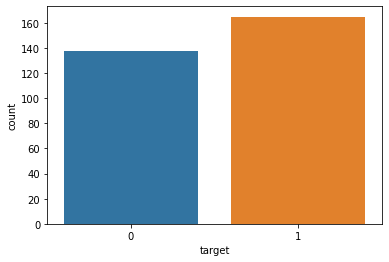

In [4]:
#countplot on dependable variable to understand the variance 
sns.countplot("target",data=data)

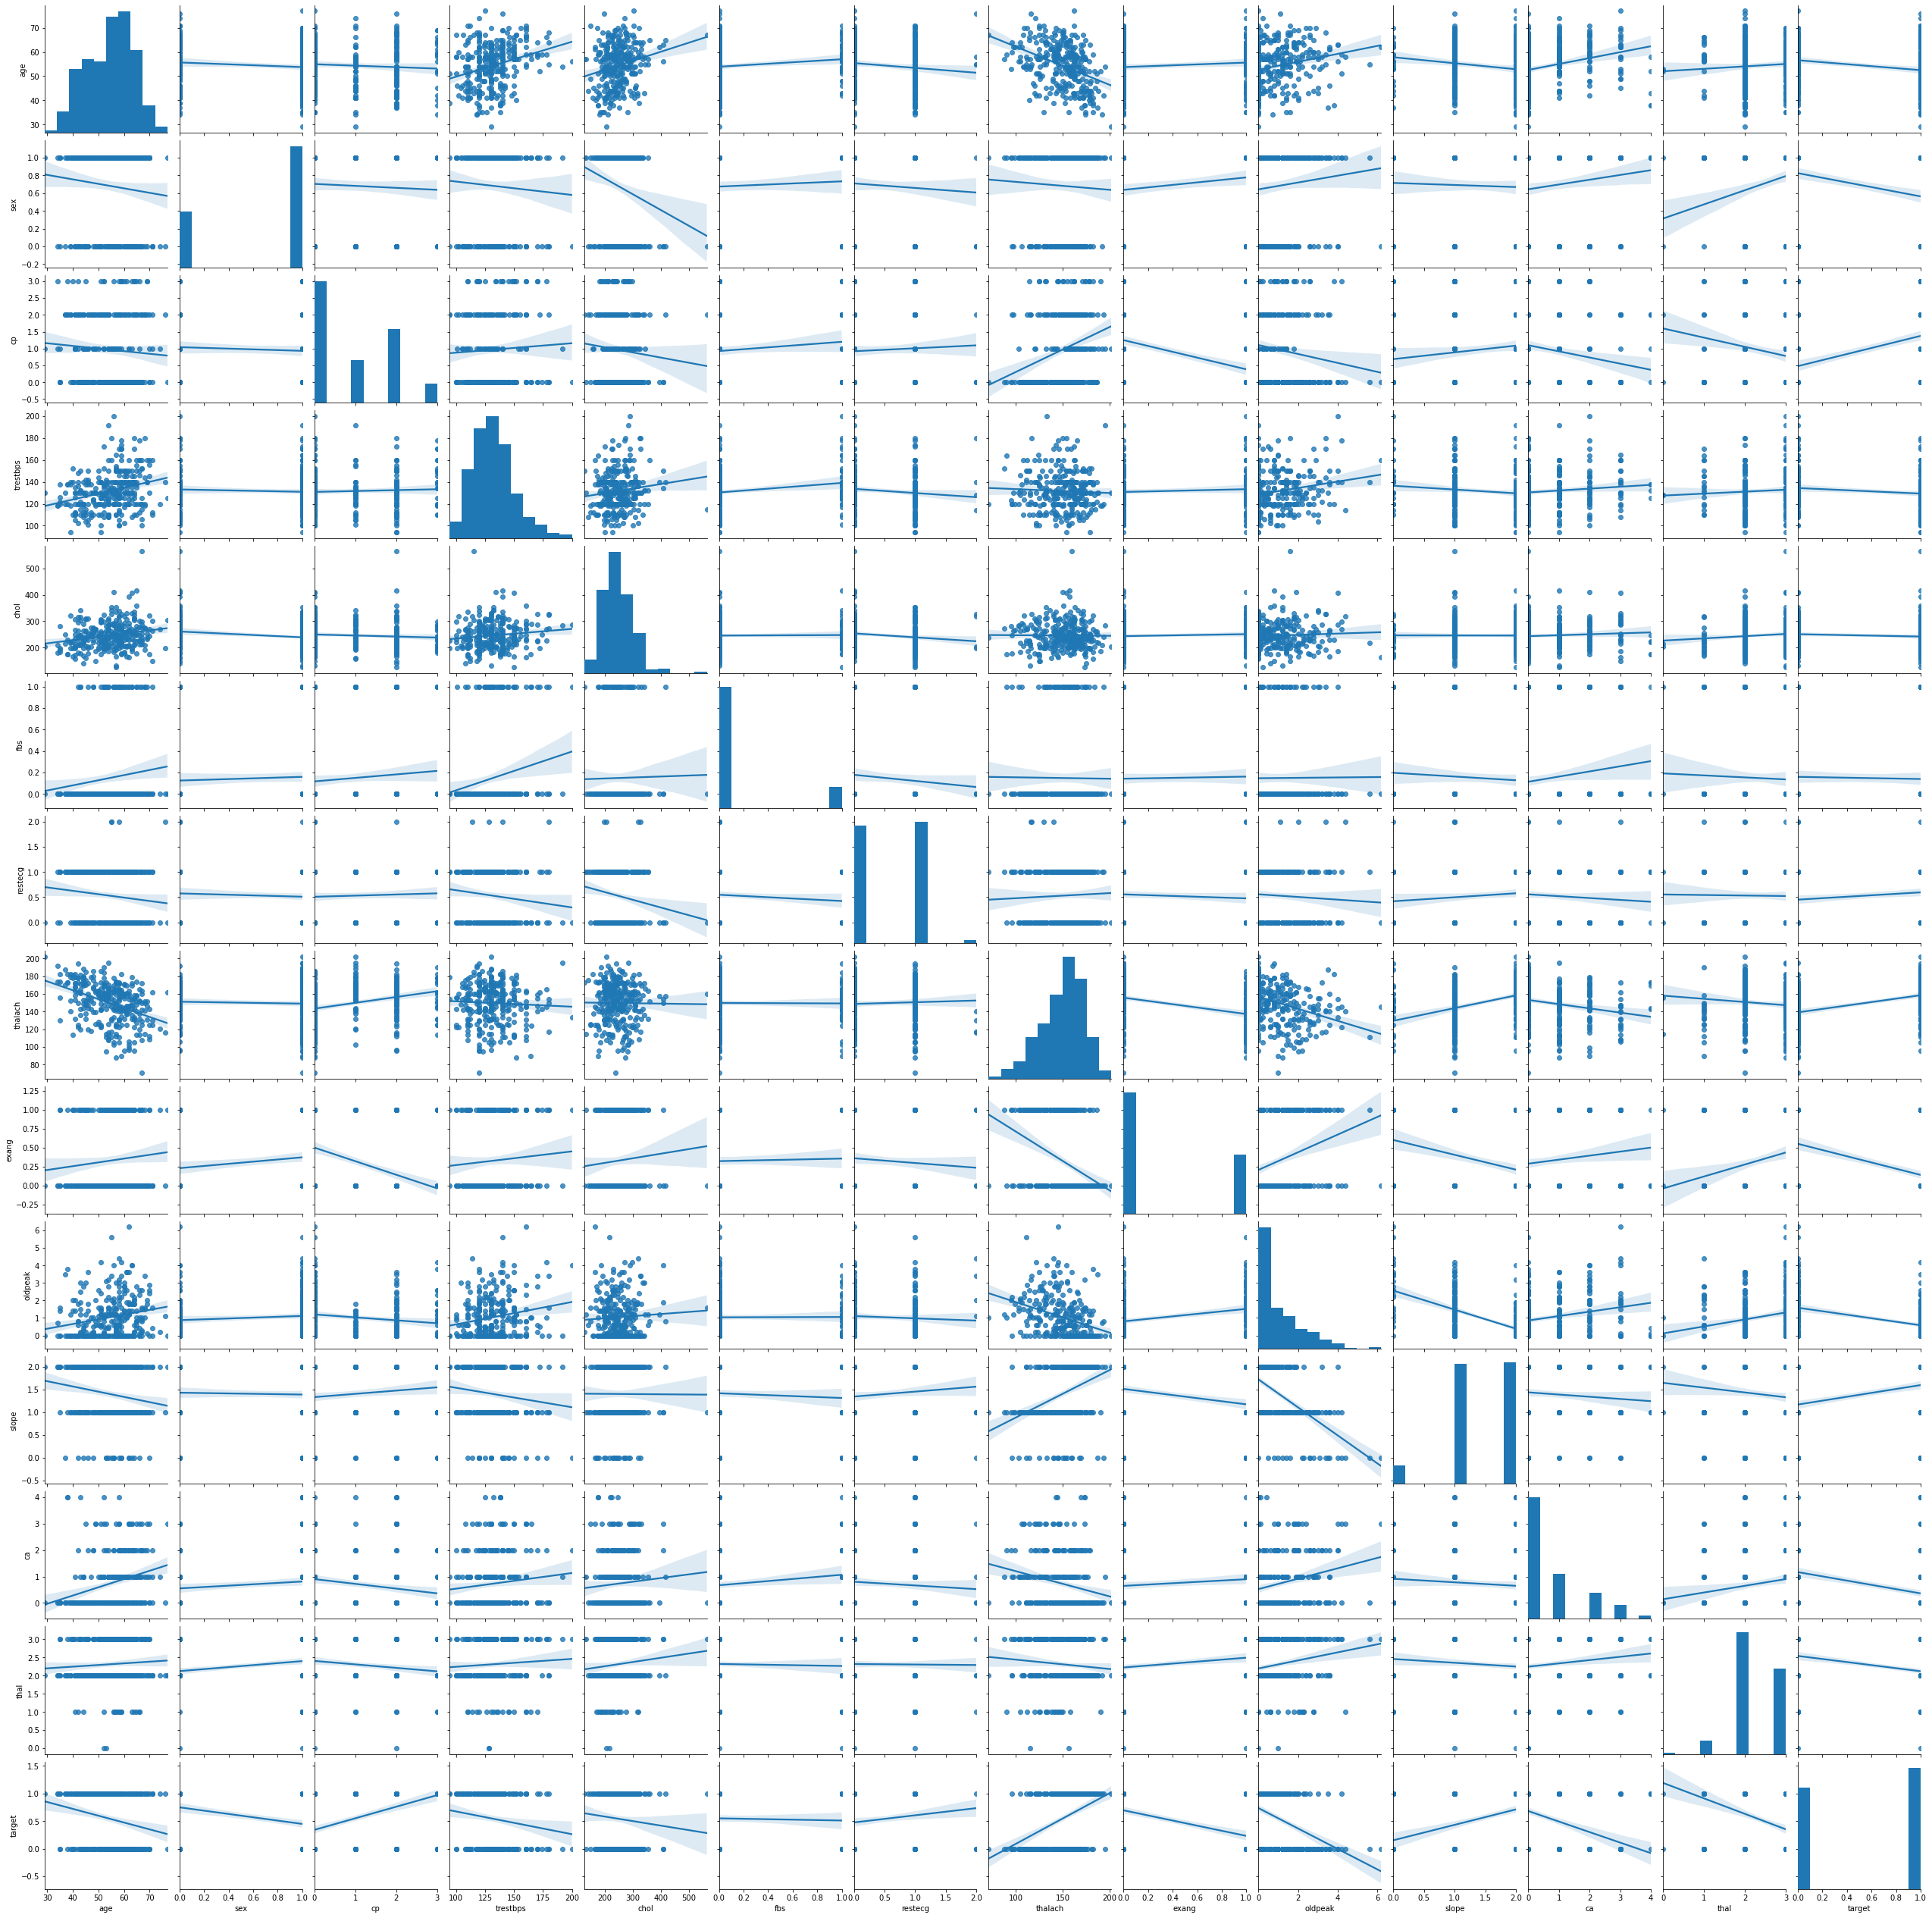

In [5]:
# pairplot between the independent variables to check correlation 
sns.pairplot(data,kind="reg")

In [6]:
# splitting data for training and testing
independent_variables = data.iloc[:,0:13]
dependent_variable = data.iloc[:,13:14]

xtrain,xtest,ytrain,ytest = train_test_split(independent_variables,dependent_variable,test_size=0.25)

#initializing model
logisticReg = LogisticRegression()
logisticReg.fit(xtrain,ytrain)
#prediction 
ypred = logisticReg.predict(xtest)

#metrics 

result = mean_squared_error(ytest,ypred)
print("mean_squared_error",result)
abresult = mean_absolute_error(ytest,ypred)
print("mean_absolute_error",abresult)
accuracyResult=accuracy_score(ytest,ypred)
print("accuracy_score",accuracyResult*100)
recallResult = recall_score(ytest,ypred)
print("recall_score",recallResult*100)
precisionResult = precision_score(ytest,ypred)
print("precision_score",precisionResult*100)






mean_squared_error 0.15789473684210525
mean_absolute_error 0.15789473684210525
accuracy_score 84.21052631578947
recall_score 89.13043478260869
precision_score 85.41666666666666


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
